In [12]:
import pandas as pd #tdata analysis and manipulation
import geopandas as gpd #geographical data
import numpy as np #numerical computing
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization


In [74]:
#For these analyses, three CSV files will ve used:
# master_table.csv : the table with all the information extracted from the references
# author_analysis.csv : for analyses regarding the authors of the references
# approach.csv : for analyses regarding the approaches used in the references

## Authors

In [13]:
#Read the authorship table
df = pd.read_csv('author_analysis.csv', sep=';')

In [14]:
#reading a sahpefile of country shapes
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'
gpd_country = gpd.read_file(country_shapes)

### All languages

In [15]:
#Subsetting for getting unique authors per country (the same author can still appear in more than one country)
df2 = df[['author', 'country']] #getting authors and their countries of residence
df2 = df2.drop_duplicates() #removing duplicates
authors_counting = pd.DataFrame(df2.groupby('country').count()['author'] ) #Counting the numbe of authors per country
#Merging the counting with the countries shape
authors_country = gpd_country.merge(authors_counting, right_on='country', left_on='name', how = 'left')
authors_country =authors_country.rename(columns={'author':'counting'})

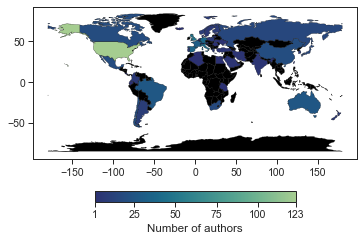

In [16]:
#Plotting a choropleth map of the number of authors per country
fig, ax = plt.subplots(1, 1)
ax = authors_country.plot(column = 'counting', legend = True, ax=ax,cmap = 'crest_r', edgecolor = 'black', linewidth = 0.25 ,
           legend_kwds={'shrink':0.6,'orientation': "horizontal", 'label': 'Number of authors', 'ticks':[1,25,50,75,100,123]},
                      missing_kwds={'color': 'black'})
#Saving the map
plt.savefig('author_map.png', dpi = 600, bbox_inches = 'tight')

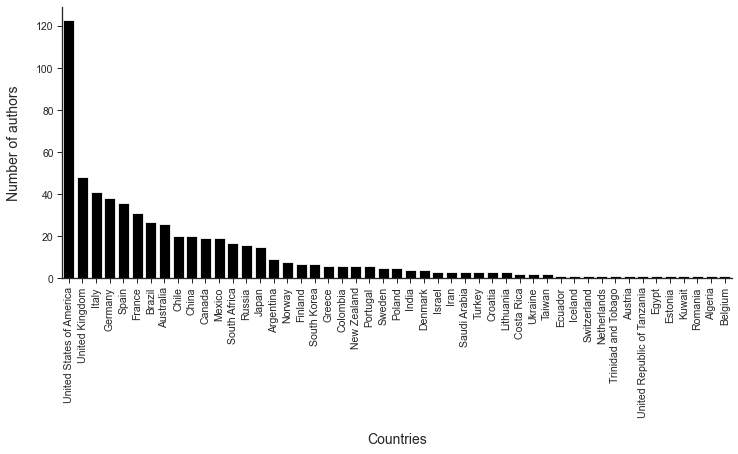

In [17]:
#Plotting a bar graph of the number of authors per country

sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(12,5))
order = dict(df2['country'].value_counts()).keys() #creating the order of the bars
ax = sns.countplot(data = df2, x = 'country', order = order, color = 'black')
#Editing the graph's appearance
ax.spines['left'].set_linewidth(1.3)
ax.spines['bottom'].set_linewidth(1.3)
plt.yticks(ticks = [0,20,40,60,80,100,120])
plt.xticks(rotation = 90)
plt.xlabel('Countries', fontdict={'fontsize': 14}, labelpad = 15)
plt.ylabel('Number of authors', fontdict={'fontsize': 14}, labelpad = 15)
sns.despine()
#Saving the figure
plt.savefig('author_barplot.png', dpi = 600, bbox_inches = 'tight')

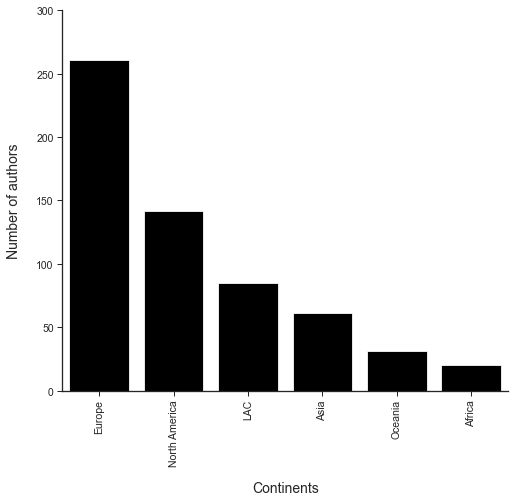

In [18]:
#Subsetting for getting unique authors per countinent (the same author can still appear in more than one continent)
df3 = df[['author', 'continent']] #Getting the auhors' and their continent of residence
df3 = df3.drop_duplicates() #Removing duplicates

#Plotting a bar graph of the number of authors per continent
sns.set_context("paper", font_scale=1.2)
order = dict(df3['continent'].value_counts()).keys() #creating the order of the bars
plt.figure(figsize=(8,7))
ax = sns.countplot(data = df3, x = 'continent', order = order, color = 'black')
plt.yticks(ticks = [0,50,100,150,200,250,300])
ax.spines['left'].set_linewidth(1.3)
ax.spines['bottom'].set_linewidth(1.3)
plt.xticks(rotation = 90)
plt.xlabel('Continents', fontdict={'fontsize': 14}, labelpad = 15)
plt.ylabel('Number of authors', fontdict={'fontsize': 14}, labelpad = 15)
sns.despine()
plt.savefig('author_continent_barplot.png', dpi = 600, bbox_inches = 'tight')

<Figure size 720x576 with 0 Axes>

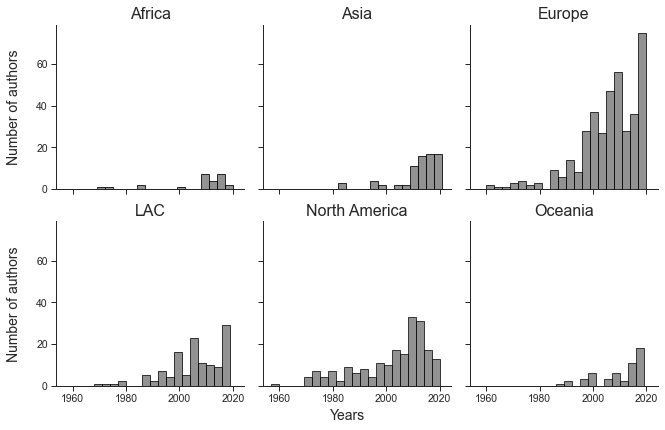

In [19]:
#Subsetting for getting the number of unique authors by countinent per year 
df4 = df[['author', 'continent', 'year_of_publication']] 
df4 = df4.drop_duplicates() #Removing duplicates

#Plotting histograms of the number of authors per year for each continent
sns.set_theme(context = "paper", font_scale=1.2, style = 'ticks')
plt.figure(figsize=(10,8))
g = sns.FacetGrid(df4, col = 'continent', col_order = ['Africa','Asia','Europe','LAC','North America','Oceania'],
                 col_wrap=3)
#Bin width is defined as 3 years
g.map_dataframe(sns.histplot, 'year_of_publication',color = '#6e6e6e',edgecolor = 'black',binwidth = 3)
g.set_axis_labels('', 'Number of authors',fontdict={'fontsize': 14}, labelpad = 15)
g.set_titles(col_template='{col_name}', size= 16)
g.fig.suptitle('Years', y = 0.05, size = 14)
#Saving the figure
plt.savefig('continent_year_facetplot.png', dpi = 600, bbox_inches = 'tight')

### Only references in English

In [20]:
#Subsetting for only references in English
df_en = df.loc[df['language']=='english']

In [21]:
#Subsetting for getting unique authors per country (the same author can still appear in more than one country)
df2 = df_en[['author', 'country']] #getting authors and their countries of residence
df2 = df2.drop_duplicates() #removing duplicates
authors_counting = pd.DataFrame(df2.groupby('country').count()['author'] ) #Counting the numbe of authors per country
#Merging the counting with the countries shape
authors_country = gpd_country.merge(authors_counting, right_on='country', left_on='name', how = 'left')
authors_country =authors_country.rename(columns={'author':'counting'})

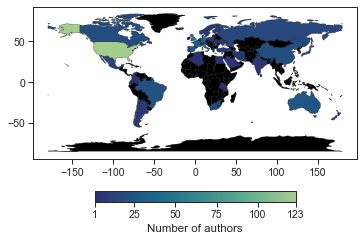

In [22]:
#Plotting a choropleth map of the number of authors per country
fig, ax = plt.subplots(1, 1)
ax = authors_country.plot(column = 'counting', legend = True, ax=ax,cmap = 'crest_r', edgecolor = 'black', linewidth = 0.25 ,
           legend_kwds={'shrink':0.6,'orientation': "horizontal", 'label': 'Number of authors', 'ticks':[1,25,50,75,100,123]},
                      missing_kwds={'color': 'black'})
#Saving the map
plt.savefig('en_author_map.png', dpi = 600, bbox_inches = 'tight')

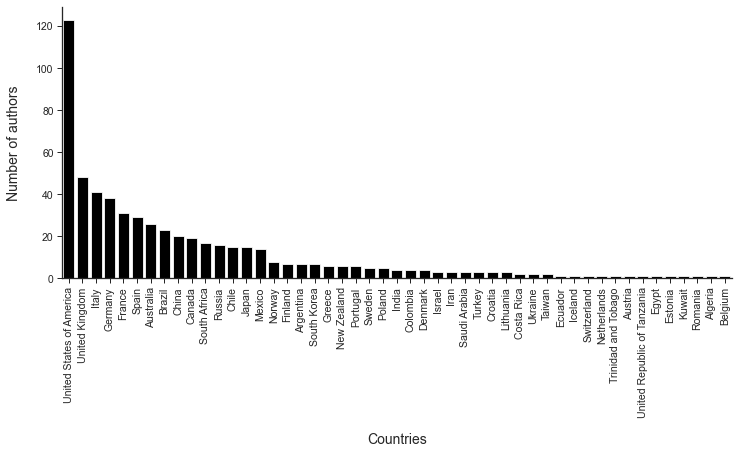

In [23]:
#Plotting a bar graph of the number of authors per country

sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(12,5))
order = dict(df2['country'].value_counts()).keys() #creating the order of the bars
ax = sns.countplot(data = df2, x = 'country', order = order, color = 'black')
ax.spines['left'].set_linewidth(1.3)
ax.spines['bottom'].set_linewidth(1.3)
plt.yticks(ticks = [0,20,40,60,80,100,120])
plt.xticks(rotation = 90)
plt.xlabel('Countries', fontdict={'fontsize': 14}, labelpad = 15)
plt.ylabel('Number of authors', fontdict={'fontsize': 14}, labelpad = 15)
#ax.bar_label(ax.containers[0])
sns.despine()
plt.savefig('en_author_barplot.png', dpi = 600, bbox_inches = 'tight')

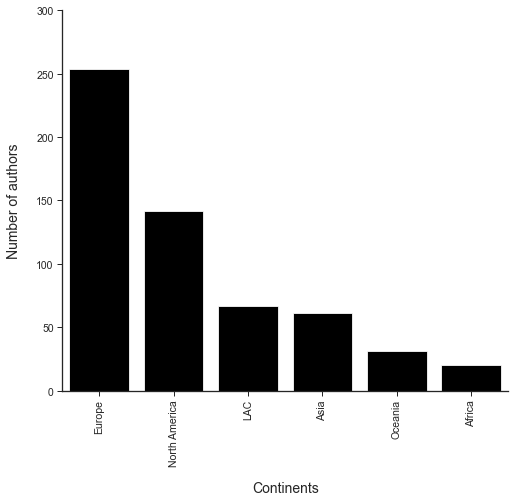

In [24]:
#Subsetting for getting unique authors per countinent (the same author can still appear in more than one continent)
df3 = df_en[['author', 'continent']] #Getting the auhors' and their continent of residence
df3 = df3.drop_duplicates() #Removing duplicates

#Plotting a bar graph of the number of authors per continent
sns.set_context("paper", font_scale=1.2)
order = dict(df3['continent'].value_counts()).keys() #creating the order of the bars
plt.figure(figsize=(8,7))
ax = sns.countplot(data = df3, x = 'continent', order = order, color = 'black')
plt.yticks(ticks = [0,50,100,150,200,250,300])
ax.spines['left'].set_linewidth(1.3)
ax.spines['bottom'].set_linewidth(1.3)
plt.xticks(rotation = 90)
plt.xlabel('Continents', fontdict={'fontsize': 14}, labelpad = 15)
plt.ylabel('Number of authors', fontdict={'fontsize': 14}, labelpad = 15)
#ax.bar_label(ax.containers[0])
sns.despine()
plt.savefig('en_author_continent_barplot.png', dpi = 600, bbox_inches = 'tight')

### Only references in Spanish or Portuguese

In [25]:
#Subsetting for only references in Spanish or Portuguese
df_es_pt = df.loc[df['language'].isin(['spanish','portuguese'])]

In [26]:
#Subsetting for getting unique authors per country (the same author can still appear in more than one country)
df2 = df_es_pt[['author', 'country']] #getting authors and their countries of residence
df2 = df2.drop_duplicates() #removing duplicates
authors_counting = pd.DataFrame(df2.groupby('country').count()['author'] ) #Counting the numbe of authors per country
#Merging the counting with the countries shape
authors_country = gpd_country.merge(authors_counting, right_on='country', left_on='name', how = 'left')
authors_country =authors_country.rename(columns={'author':'counting'})

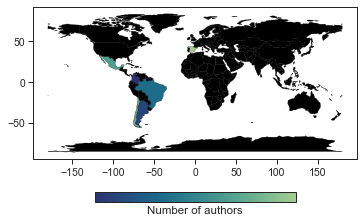

In [27]:
#Plotting a choropleth map of the number of authors per country
fig, ax = plt.subplots(1, 1)
ax = authors_country.plot(column = 'counting', legend = True, ax=ax,cmap = 'crest_r', edgecolor = 'black', linewidth = 0.25 ,
           legend_kwds={'shrink':0.6,'orientation': "horizontal", 'label': 'Number of authors', 'ticks':[1,25,50,75,100,123]},
                      missing_kwds={'color': 'black'})
#Saving the map
plt.savefig('es_pt_author_map.png', dpi = 600, bbox_inches = 'tight')

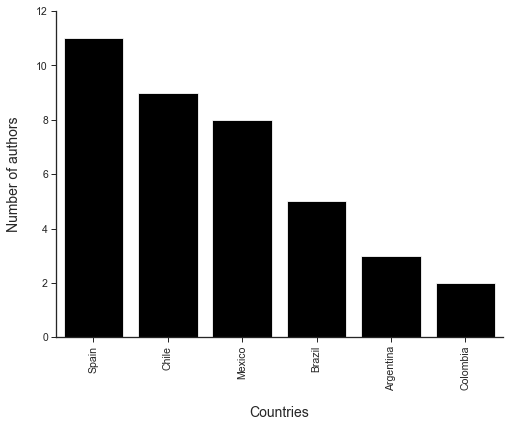

In [28]:
#Plotting a bar graph of the number of authors per country

sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(8,6))
order = dict(df2['country'].value_counts()).keys() #creating the order og the bars
ax = sns.countplot(data = df2, x = 'country', order = order, color = 'black')
ax.spines['left'].set_linewidth(1.3)
ax.spines['bottom'].set_linewidth(1.3)
plt.yticks(ticks = [0,2,4,6,8,10,12])
plt.xticks(rotation = 90)
plt.xlabel('Countries', fontdict={'fontsize': 14}, labelpad = 15)
plt.ylabel('Number of authors', fontdict={'fontsize': 14}, labelpad = 15)
#ax.bar_label(ax.containers[0])
sns.despine()
plt.savefig('es_pt_author_barplot.png', dpi = 600, bbox_inches = 'tight')

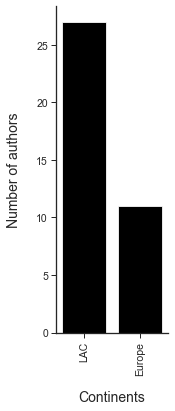

In [29]:
#Subsetting for getting unique authors per countinent (the same author can still appear in more than one continent)
df3 = df_es_pt[['author', 'continent']] #Getting the auhors' and their continent of residence
df3 = df3.drop_duplicates() #Removing duplicates

#Plotting a bar graph of the number of authors per continent
sns.set_context("paper", font_scale=1.2)
order = dict(df3['continent'].value_counts()).keys() #creating the order of the bars
plt.figure(figsize=(2,6))
ax = sns.countplot(data = df3, x = 'continent', order = order, color = 'black')
ax.spines['left'].set_linewidth(1.3)
ax.spines['bottom'].set_linewidth(1.3)
plt.xticks(rotation = 90)
plt.xlabel('Continents', fontdict={'fontsize': 14}, labelpad = 15)
plt.ylabel('Number of authors', fontdict={'fontsize': 14}, labelpad = 15)
#ax.bar_label(ax.containers[0])
sns.despine()
plt.savefig('es_pt_author_continent_barplot.png', dpi = 600, bbox_inches = 'tight')

## Year of publication

In [30]:
#Read the master table
df = pd.read_csv('master_table.csv', sep=';')

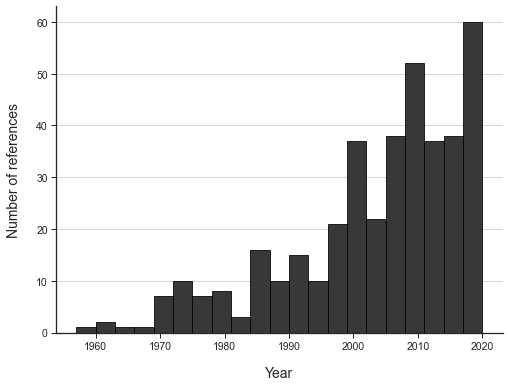

In [31]:
#Histogram of the number of references per year
sns.set_theme(context = "paper", font_scale=1.2, style = 'ticks')
plt.figure(figsize=(8,6))
#bin width is defined as 3 years
ax = sns.histplot(data = df, x = 'year_of_publication', color = '#383838', edgecolor = 'black', alpha=1,binwidth = 3)
ax.yaxis.grid()
ax.spines['left'].set_linewidth(1.3)
ax.spines['bottom'].set_linewidth(1.3)
plt.xlabel('Year', fontdict={'fontsize': 14}, labelpad = 15)
plt.ylabel('Number of references', fontdict={'fontsize': 14}, labelpad = 15)
sns.despine()
plt.savefig('year_hist.png', dpi = 600, bbox_inches = 'tight')

## Taxonomy

In [32]:
#Read the master table
df = pd.read_csv('master_table.csv', sep=';')

In [33]:
#Subsetting the master table
df2 = df.loc[:,('family_studied','year_of_publication','language')]
#Splitting cells to get each family in a row
df2['family_studied']=df2['family_studied'].str.split(',')
df2=df2.apply(pd.Series.explode)
#Resetting the index (optional)
df2.reset_index(inplace=True, drop=True)
#Capitalizing the first letter (optional)
df2['family_studied'] = df2['family_studied'].str.capitalize()

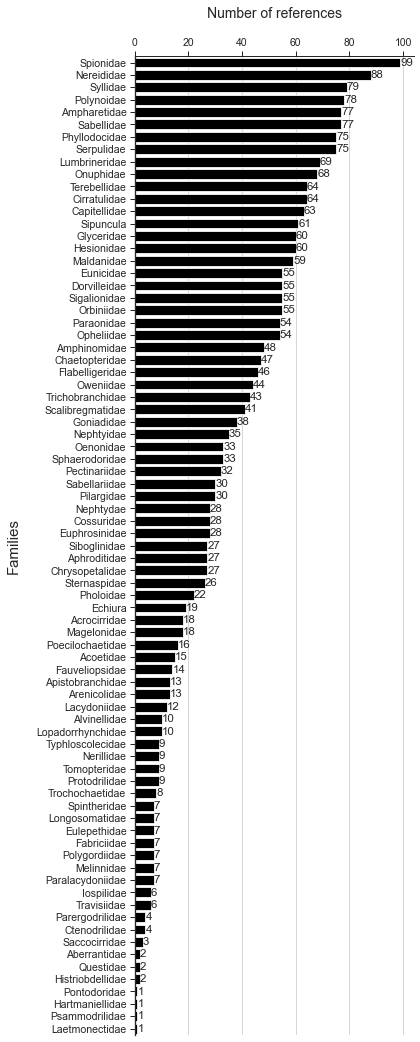

In [34]:
order = dict(df2['family_studied'].value_counts()).keys() #creating the order of the bars

sns.set_theme(style="ticks", context="paper", font_scale=1.2)
plt.figure(figsize=(5,18))
ax = sns.countplot(data = df2, y = 'family_studied', color='black', orient = 'h', order=order)
ax.xaxis.grid()
ax.spines['left'].set_linewidth(1.3)
ax.spines['bottom'].set_linewidth(1.3)
plt.xticks(rotation = 0, ticks = [0,20,40,60,80,100])
plt.title('Number of references', fontdict={'fontsize': 14}, pad = 20)
plt.ylabel('Families', fontdict={'fontsize': 15}, labelpad = 15)
ax.set_xlabel('')
ax.bar_label(ax.containers[0])
sns.despine(right = True, bottom = True, top = False)
#Saving the figure
plt.savefig('family_barplot.png', dpi = 600, bbox_inches = 'tight')

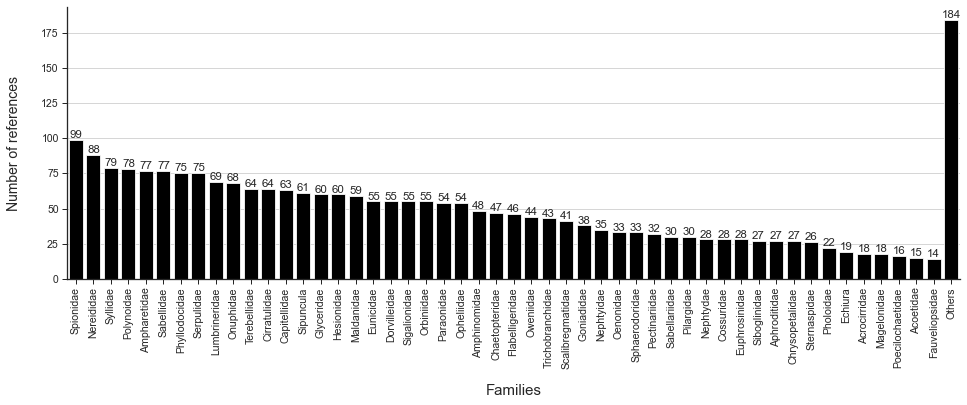

In [35]:
#Optional: summarizing the graphs
#creating a counting table
df3 = pd.DataFrame({'Family':list(df2['family_studied'].value_counts().axes[0]),
                                'Counting':df2['family_studied'].value_counts()})
#Resetting the index
df3.reset_index(inplace=True, drop=True)
#Keeping only the 50 most present families and grouping the others
df3 = df3.append({'Family': 'Others', 'Counting':sum(df3.Counting[50:])}, ignore_index = True)
#Removing other families
df3 = df3.drop(df3.index[50:-1])
#Plotting the summarized graph
sns.set_theme(style="ticks", context="paper", font_scale=1.2)
plt.figure(figsize=(16,5))
ax = sns.barplot(data = df3, x = 'Family', y= 'Counting', color='black', orient = 'v')
ax.yaxis.grid()
ax.spines['left'].set_linewidth(1.3)
ax.spines['bottom'].set_linewidth(1.3)
plt.xticks(rotation = 90)
plt.ylabel('Number of references', fontdict={'fontsize': 14}, labelpad = 20)
plt.xlabel('Families', fontdict={'fontsize': 15}, labelpad = 15)
ax.bar_label(ax.containers[0])
sns.despine()
#Saving the figure
plt.savefig('family_barplot_summarized.png', dpi = 600, bbox_inches = 'tight')

## Marine realms

In [39]:
#Read the master table
df = pd.read_csv('master_table.csv', sep=';')

In [40]:
#Subsetting the master table
df2 = df.loc[:,('marine_realm','year_of_publication','language')]
#Splitting cells to get each realm in a row
df2['marine_realm']=df2['marine_realm'].str.split(',')
df2=df2.apply(pd.Series.explode)
#Optional: reset index
df2.reset_index(inplace=True, drop=True)

In [41]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) #Reading a shapefile of world land
#Reading the shapefile of Marine Realms available at
realm = gpd.read_file(r"C:\Users\willi\Documents\python\marinerealms\MarineRealms.shp")

<ipython-input-41-f78ebe4ef0f0>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) #Reading a shapefile of world land


### All languages

In [42]:
#creating a counting table
df3 = pd.DataFrame({'Realm':list(df2['marine_realm'].value_counts().axes[0]),
                                'Counting':df2['marine_realm'].value_counts()})
#converting the 'Realm' column to int64 format
df3['Realm']=pd.to_numeric(df3['Realm'])
#Merging with the marine realms shapefile
realm = realm.merge(df3, on='Realm', how='left')

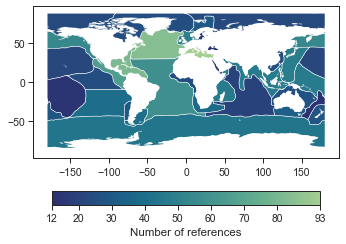

In [43]:
#Plotting a choropleth map of the number of referrences studying each marine realm
fig, ax = plt.subplots(1, 1)
base = realm.plot(column = 'Counting', legend = True, ax=ax,cmap = 'crest_r', edgecolor='white', linewidth = 0.5,
           legend_kwds={'shrink':0.8,'label': "Number of references",'orientation': "horizontal",
                        'ticks':[12,20,30,40,50,60,70,80,93]}, alpha = 1 )
world.plot(ax = base,color='white', edgecolor='white', linewidth = 0.1)#plotting the sahpe of landmasses over
#Saving the figure
plt.savefig('realms_map.png',dpi = 600, bbox_inches = 'tight')

### Only references in English

In [50]:
#Subsetting the master table
df2 = df.loc[:,('marine_realm','year_of_publication','language')]
#Splitting cells to get each realm in a row
df2['marine_realm']=df2['marine_realm'].str.split(',')
df2=df2.apply(pd.Series.explode)
#Optional: reset index
df2.reset_index(inplace=True, drop=True)

In [51]:
#Subsetting to get only references in English
df3 = df2.loc[df2['language']=='english']
#Realoading the marine realms shapefile
realm = gpd.read_file(r"C:\Users\willi\Documents\python\marinerealms\MarineRealms.shp")

In [52]:
#creating a counting table
df4 = pd.DataFrame({'Realm':list(df3['marine_realm'].value_counts().axes[0]),
                                'Counting':df3['marine_realm'].value_counts()})
#converting the 'Realm' column to int64 format
df4['Realm']=pd.to_numeric(df4['Realm'])
#Merging with the marine realms shapefile
realm = realm.merge(df4, on='Realm', how='left')

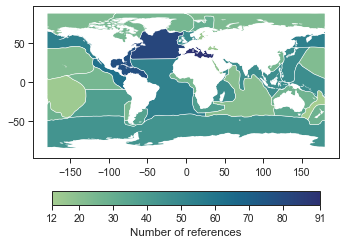

In [53]:
#Plotting a choropleth map of the number of referrences studying each marine realm
fig, ax = plt.subplots(1, 1)
base = realm.plot(column = 'Counting', legend = True, ax=ax,cmap = 'crest', edgecolor='white', linewidth = 0.5,
           legend_kwds={'shrink':0.8,'label': "Number of references",'orientation': "horizontal",
                        'ticks':[12,20,30,40,50,60,70,80,91]}, alpha = 1 )
world.plot(ax = base,color='white', edgecolor='white', linewidth = 0.1) #plotting the sahpe of landmasses over
#Saving the figure
plt.savefig('en_realms_map.png',dpi = 600, bbox_inches = 'tight')

### Only references in Spanish or Portuguese

In [54]:
#Subsetting the master table
df2 = df.loc[:,('marine_realm','year_of_publication','language')]
#Splitting cells to get each realm in a row
df2['marine_realm']=df2['marine_realm'].str.split(',')
df2=df2.apply(pd.Series.explode)
#Optional: reset index
df2.reset_index(inplace=True, drop=True)

In [55]:
#Subsetting to get only references in Spanish or Portuguese
df3 = df2.loc[df2['language'].isin(['spanish','portuguese'])]
#Realoading the marine realms shapefile
realm = gpd.read_file(r"C:\Users\willi\Documents\python\marinerealms\MarineRealms.shp")

In [56]:
#creating a counting table
df4 = pd.DataFrame({'Realm':list(df3['marine_realm'].value_counts().axes[0]),
                                'Counting':df3['marine_realm'].value_counts()})
#converting the 'Realm' column to int64 format
df4['Realm']=pd.to_numeric(df4['Realm'])
#Merging with the marine realms shapefile
realm = realm.merge(df4, on='Realm', how='left')

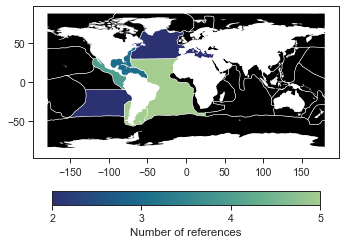

In [57]:
#Plotting a choropleth map of the number of referrences studying each marine realm
fig, ax = plt.subplots(1, 1)
base = realm.plot(column = 'Counting', legend = True, ax=ax,cmap = 'crest_r', edgecolor='white', linewidth = 0.5,
           legend_kwds={'shrink':0.8,'label': "Number of references",'orientation': "horizontal",
                        'ticks':[1,2,3,4,5]}, alpha = 1, missing_kwds={'color': 'black'} )
world.plot(ax = base,color='white', edgecolor='white', linewidth = 0.1) #plotting the sahpe of landmasses over
#Saving the figure
plt.savefig('es_pt_realms_map.png',dpi = 600, bbox_inches = 'tight')

## Depth

In [58]:
#Read the master table
df = pd.read_csv('master_table.csv', sep=';')

In [59]:
#Subsetting the master table
province = df.loc[:,'province']
#Splitting cells to get each province in a row
province=province.str.split(',')
province=province.explode()
province=province.str.split('/')
province=province.explode()
#Optional: reset index
province.reset_index(inplace=True, drop=True)

In [60]:
#Subsetting the benthic provinces
bent_province=province[province.isin(['littoral','sublittoral','bathyal','abyssal','hadal'])]

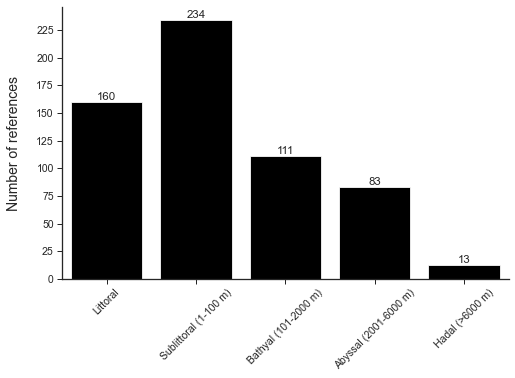

In [61]:
#Plotting a bar graph of the number of references per benthic province
sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(8,5))
ax = sns.countplot(x = bent_province, color = 'black', order=['littoral','sublittoral','bathyal','abyssal','hadal'])
ax.spines['left'].set_linewidth(1.3)
ax.spines['bottom'].set_linewidth(1.3)
plt.yticks(ticks = [0,25,50,75,100,125,150,175,200,225])
plt.xticks(ticks=[0,1,2,3,4],rotation = 45,
    labels=['Littoral','Sublittoral (1-100 m)','Bathyal (101-2000 m)','Abyssal (2001-6000 m)','Hadal (>6000 m)'])
plt.xlabel('')
plt.ylabel('Number of references', fontdict={'fontsize': 14}, labelpad = 15)
ax.bar_label(ax.containers[0])
sns.despine()

plt.savefig('province_barplot_benthic.png', dpi = 600, bbox_inches = 'tight')

In [62]:
#Subsetting the pelaic provinces
plank_province=province[province.isin(['epipelagic','mesopelagic','bathypelagic'])]

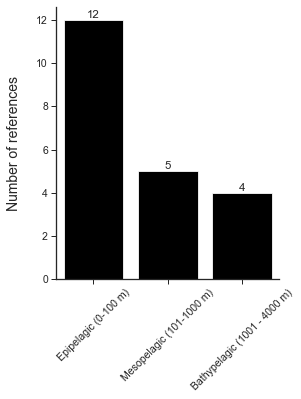

In [63]:
#Plotting a bar graph of the number of references per pelagic province
sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(4,5))
ax = sns.countplot(x = plank_province, color = 'black', order=['epipelagic','mesopelagic','bathypelagic'])
ax.spines['left'].set_linewidth(1.3)
ax.spines['bottom'].set_linewidth(1.3)
plt.yticks(ticks = [0,2,4,6,8,10,12])
plt.xticks(ticks=[0,1,2],rotation = 45,
    labels=['Epipelagic (0-100 m)','Mesopelagic (101-1000 m)','Bathypelagic (1001 - 4000 m)'])
plt.xlabel('')
plt.ylabel('Number of references', fontdict={'fontsize': 14}, labelpad = 15)
ax.bar_label(ax.containers[0])
sns.despine()

plt.savefig('province_barplot_pelagic.png', dpi = 600, bbox_inches = 'tight')

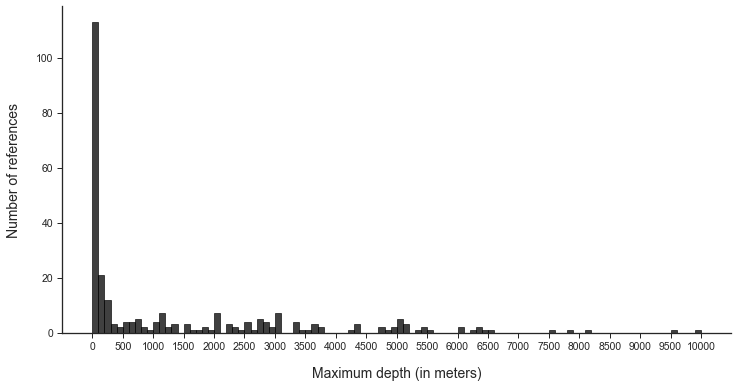

In [64]:
#Plotting a histogram of the number of references per maximum depth studied
sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(12,6))
#bin width = 100 meters
ax = sns.histplot(data = df, x = 'maximum_depth', binwidth = 100, color = 'black', edgecolor='black')
ax.spines['left'].set_linewidth(1.3)
ax.spines['bottom'].set_linewidth(1.3)
plt.xticks(ticks = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500, 6000,6500,7000,7500,8000,8500,
                    9000,9500,10000])
plt.xlabel('Maximum depth (in meters)', fontdict={'fontsize': 14}, labelpad = 15)
plt.ylabel('Number of references', fontdict={'fontsize': 14}, labelpad = 15)
sns.despine()
#Saving the figure
plt.savefig('max_depth_hist.png', dpi = 600, bbox_inches = 'tight')

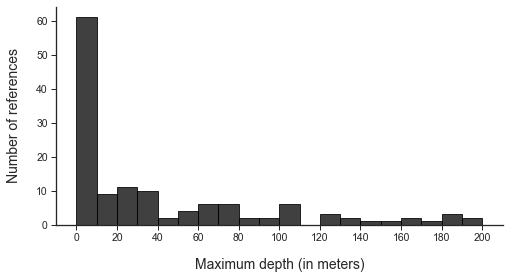

In [65]:
#subsetting with only references from below 200 meters
shallow = df['maximum_depth'][df['maximum_depth']<200]
#plotting a histogram
sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(8,4))
#bin width = 10 meters
ax = sns.histplot(x = shallow, color = 'black', binwidth = 10, edgecolor='black')
ax.spines['left'].set_linewidth(1.3)
ax.spines['bottom'].set_linewidth(1.3)
plt.xticks(ticks = [0,20,40,60,80,100,120,140,160,180,200])
plt.xlabel('Maximum depth (in meters)', fontdict={'fontsize': 14}, labelpad = 15)
plt.ylabel('Number of references', fontdict={'fontsize': 14}, labelpad = 15)
sns.despine()
#Saving the figure
plt.savefig('max_depth_shallow_hist.png', dpi = 600, bbox_inches = 'tight')

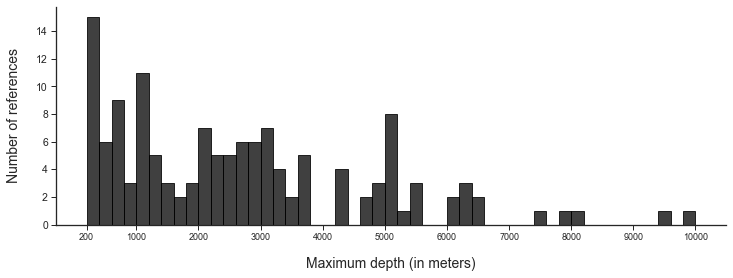

In [66]:
#subsetting with only references from 200 meters or under
deep = df['maximum_depth'][df['maximum_depth']>=200]
#plotting a histogram
sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(12,4))
#bin width = 200 meters
ax = sns.histplot(x = deep, color = 'black', binwidth = 200,edgecolor='black')
ax.spines['left'].set_linewidth(1.3)
ax.spines['bottom'].set_linewidth(1.3)
plt.xticks(ticks = [200,1000,2000,3000,4000,5000,6000,7000,8000,
                    9000,10000], fontsize=9)
plt.xlabel('Maximum depth (in meters)', fontdict={'fontsize': 14}, labelpad = 15)
plt.ylabel('Number of references', fontdict={'fontsize': 14}, labelpad = 15)
sns.despine()
#Saving the figure
plt.savefig('max_depth_deep_hist.png', dpi = 600, bbox_inches = 'tight')

## Approaches

In [67]:
#Reading the approaches table
df = pd.read_csv('approach.csv', sep=';')

In [68]:
#Optional: 
#Creating a table grouping the references applying less common approaches by period
df2 = df.loc[df['approach'].isin(['Cladistic Biogeography', "Experimental Biogeography", 'Phylogenetic Biogeography'])][['counting','period']]
df2.set_index('period', inplace= True)
#Appending the references of the less common references as 'Others'
df = df.append({'approach':'Others','counting':sum(df2.loc['1991 - 2000']['counting'])
                ,'period':'1991 - 2000'}, ignore_index=True)
df = df.append({'approach':'Others','counting':sum(df2.loc['2001 - 2010']['counting'])
                ,'period':'2001 - 2010'}, ignore_index=True)
df = df.append({'approach':'Others','counting':df2.loc['2011 - 2020']['counting'] 
                #since there is only one line in this period, there is no need to use sum()
                ,'period':'2011 - 2020'}, ignore_index=True)

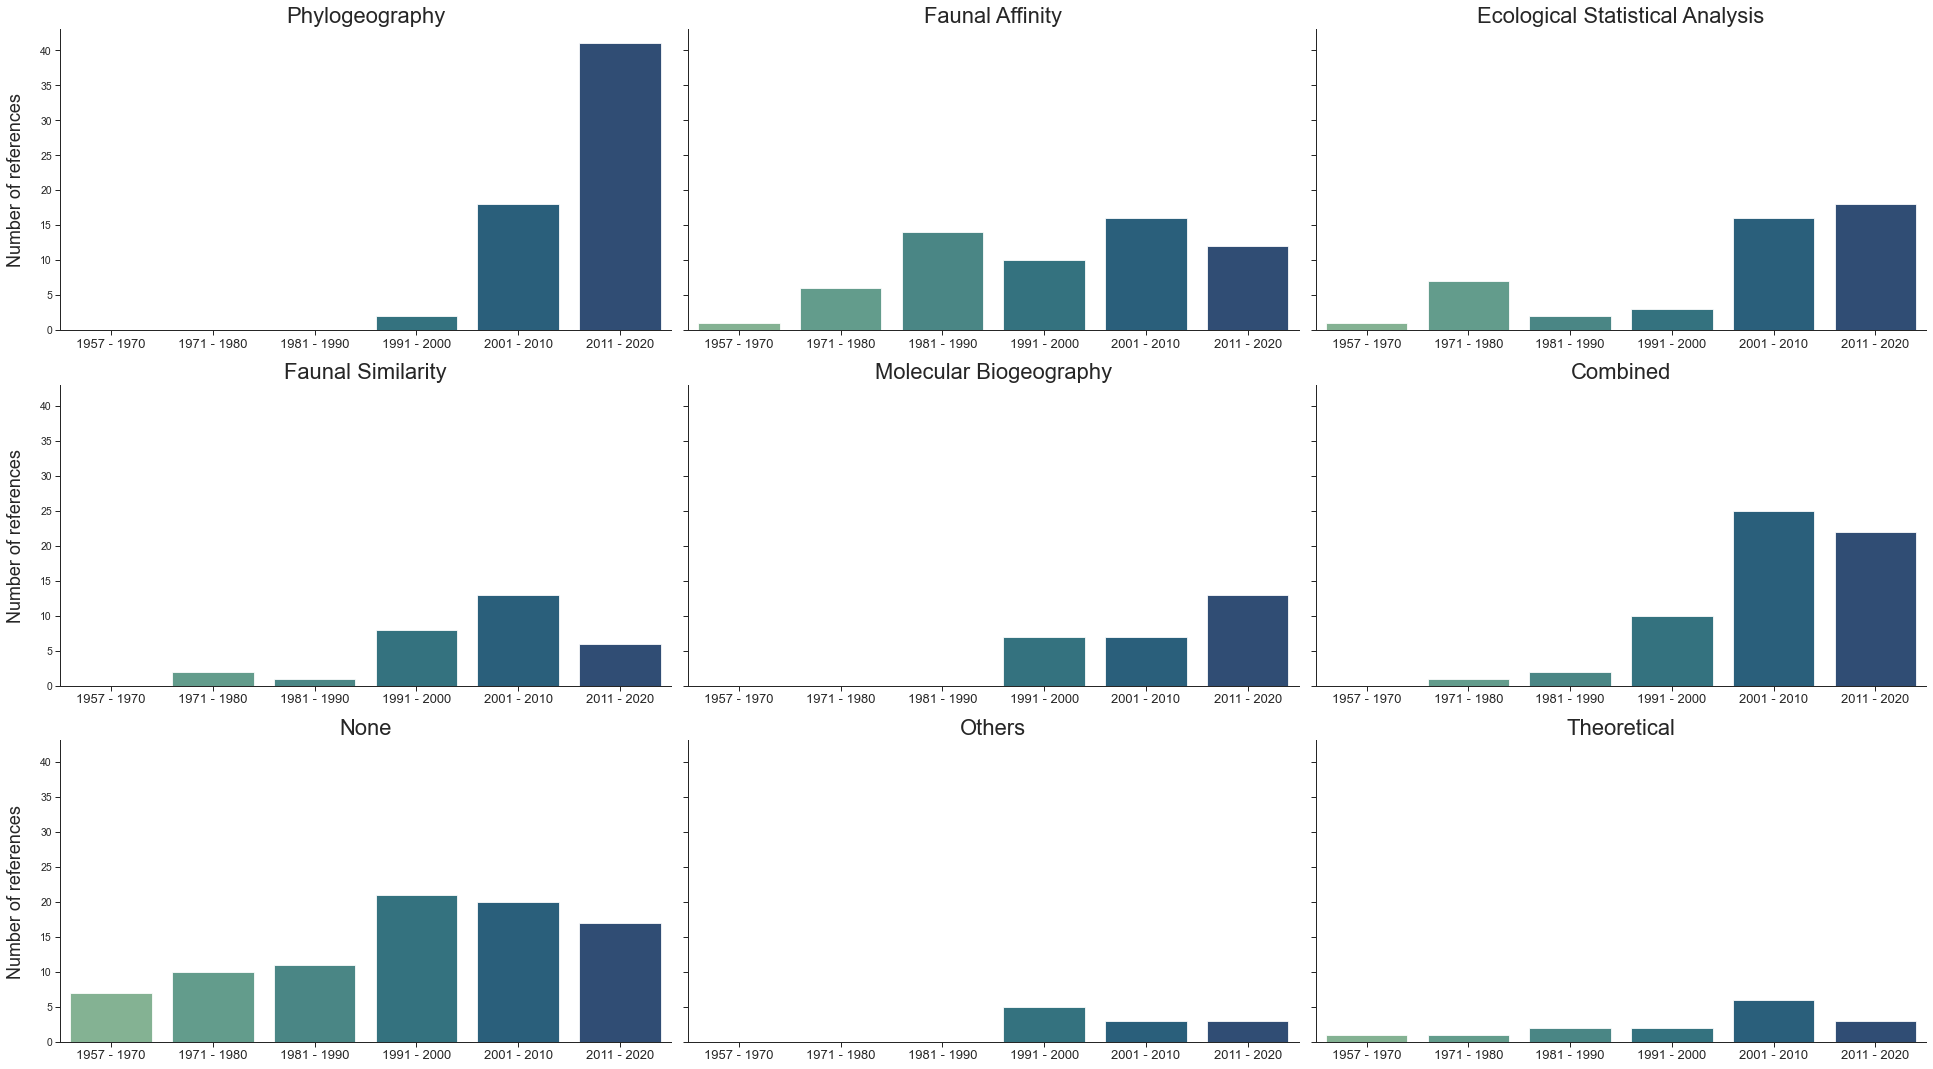

In [69]:
#Plotting the use of each approach thorugh the years. 
sns.set_context("paper", font_scale=1.2)
ax = sns.catplot(data = df, col = 'approach', y = 'counting', x = 'period', kind = 'bar', col_wrap = 3, 
                 palette = 'crest', aspect = 1.8, col_order = ['Phylogeography', 'Faunal Affinity', 
                                                               'Ecological Statistical Analysis', 'Faunal Similarity',
                                                              'Molecular Biogeography', 'Combined', 'None', 'Others',
                                                              'Theoretical']) #Removing the less common approaches
ax.set_titles('{col_name}', size  = 22)
ax.set_axis_labels('', 'Number of references',fontdict={'fontsize': 18}, labelpad = 15)

for axis in ax.axes.flat:
    axis.tick_params(labelbottom=True)
ax.set_xticklabels(size = 13)

plt.tight_layout()
plt.savefig('approach_barplot_years.png', dpi = 600, bbox_inches = 'tight')

## Human impact

In [70]:
#Read the master table
df = pd.read_csv('master_table.csv', sep=';')

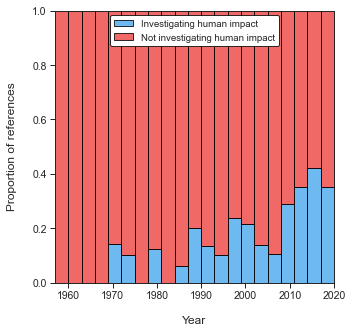

In [71]:
#Plotting the proportion of references studying the impact of human action on biogeography
sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(5,5))
#bin width is defined as 3 years
ax = sns.histplot(data = df, x = 'year_of_publication', hue = 'human_impact', multiple = 'fill', binwidth = 3,
                 palette=['#EB3734', '#3DA3EB'], edgecolor = 'black')

plt.xlabel('Year', fontdict={'fontsize': 12}, labelpad = 15)
plt.ylabel('Proportion of references', fontdict={'fontsize': 12}, labelpad = 15)

ax.legend(title='', edgecolor = 'black',fontsize='small',loc='upper center', 
          labels = ['Investigating human impact', 'Not investigating human impact'], framealpha = 1)
#Saving the figure
plt.savefig('human_action.png',dpi = 600, bbox_inches = 'tight')

## Cryptic or cosmopolitan species

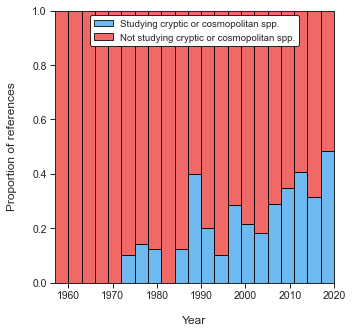

In [72]:
#Plotting the 'frequency'(?) of references studying cryptic or cosmopolitan species
sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(5,5))
#bin width is defined as 3 years
ax = sns.histplot(data = df, x = 'year_of_publication', hue = 'cryptic_or_cosmopolitan_species', 
                  multiple = 'fill', binwidth = 3, palette=['#EB3734', '#3DA3EB'], edgecolor = 'black')

plt.xlabel('Year', fontdict={'fontsize': 12}, labelpad = 15)
plt.ylabel('Proportion of references', fontdict={'fontsize': 12}, labelpad = 15)

ax.legend(title='', edgecolor = 'black',fontsize='small', loc='upper center',
          labels = ['Studying cryptic or cosmopolitan spp.', 'Not studying cryptic or cosmopolitan spp.'], framealpha = 1)
#Saving the figure
plt.savefig('cryptic_cosmopolitan.png',dpi = 600, bbox_inches = 'tight')

## Molecular data

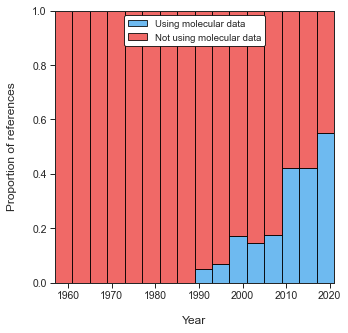

In [73]:
#Plotting the 'frequency'(?) of references using molecular data
sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(5,5))
#bin width is defined as 3 years
ax = sns.histplot(data = df, x = 'year_of_publication', hue = 'molecular_data', multiple = 'fill', 
                  binwidth = 4, hue_order = ['no', 'yes '], palette=['#EB3734', '#3DA3EB'], edgecolor = 'black')
plt.xlabel('Year', fontdict={'fontsize': 12}, labelpad = 15)
plt.ylabel('Proportion of references', fontdict={'fontsize': 12}, labelpad = 15)

ax.legend(title='', edgecolor = 'black', fontsize='small', loc='upper center',
          labels = ['Using molecular data', 'Not using molecular data'], framealpha = 1)
#Saving the figure
plt.savefig('molecular_data.png',dpi = 600, bbox_inches = 'tight')